In [4]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera

In [5]:
from codit import share_dir
DATA_PATH = os.path.join(share_dir(), 'codit', 'data')

from codit.population.networks import location

COORDINATES_CSV = os.path.join(DATA_PATH, 'city', 'population', 'coordinates_leeds.csv')
# request_coords_to_csv only needs to be run once to save all accommodation builds' coordinates in Leeds to coordinates_leeds.csv, so I commented it off here
# location.request_coords_to_csv(COORDINATES_CSV)

In [6]:
# Collect coords into list
coords_types = location.get_coords(COORDINATES_CSV)
coords = list(zip(*coords_types))

In [7]:
# Convert coordinates into numpy array
X = np.array(list(zip(*coords[:2])))
len(X)

222389

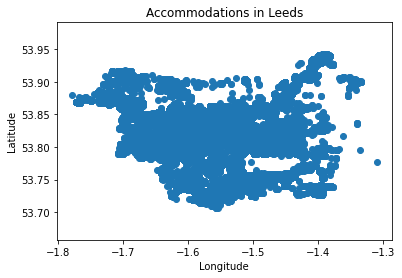

In [8]:
# Plot all the coordinates of accommodation buildings to the canvas
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title('Accommodations in Leeds')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

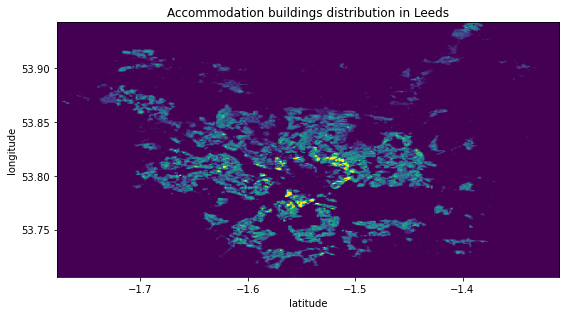

In [9]:
# Plot accommodation buildings of Leeds as heatmap
plt.rcParams["figure.figsize"] = [9, 5]
fig=plt.figure()
camera = Camera(fig)

heatmap, xedges, yedges = np.histogram2d(X[:, 0], X[:, 1], bins=300)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()

plt.title('Accommodation buildings distribution in Leeds')
plt.xlabel('latitude')
plt.ylabel('longitude')

plt.imshow(heatmap.T, extent=extent, origin='lower', vmin=0, vmax=50)

plt.show()
